# Introduccion

En esta practica usaremos python para realizar la DFT de secuencias y observar su respuesta de magnitud y fase. Asi como el efecto "ventana" en la 
representacion espectral de las secuencias.

# La DFT

Si tenemos una secuencia $x(n)$ de longitud (o numero de muestras) $N$ tal que $0 \leq n \leq N-1$, la DFT de N-puntos se define como:

$$X(m) = \sum_{n=0}^{N-1}x(n)\cdot e^{-j2\pi \frac{n}{N}m}$$

Un aspecto interesante es reemplazar el exponente complejo $e^{-j \frac{2\pi}{N}}$ de la expresion anterior por el factor $W_N=e^{-j \frac{2\pi}{N}}$. Mas adelante se usara este factor para explicar el algoritmo FFT. Por tanto, la expresion de la DFT de x(n) se convierte en:

$$X(m) = \sum_{n=0}^{N-1}x(n)\cdot  W_N^{nm}$$

Ademas, la DFT inversa consiste en aplicar el conjugado a $W_N^{nm}$ y escalando la expresion a $1/N$ lo que se obtiene:

$$x(n) = \frac{1}{N} \sum_{m=0}^{N-1}X(m)\cdot  W_N^{-nm}$$

# Implementacion en Python

Para poder realizar la DFT e IDFT usaremos el "truco" de la practica 4 donde aplicamos matrices para el calculo de estas transformaciones (en dicha practica usamos ese truco para calcular la DTFT).

Si hacemos que la secuencia $\{x(n)\}$ sea un vector columna $\mathbf{x}$, y la secuencia DFT $\{X(m) \}$ como otro vector columna $\mathbf{X}$

Tenemos que existe una matriz $N \times N$ (N filas y N columnas), la cual esta definida como:

$$\mathbf{W_{N}}=\left[W_{N}^{mn}\right]=\underset{\downarrow}{m}\overset{n\rightarrow}{\left[\begin{array}{cccc}
1 & 1 & \cdots & 1\\
1 & W_{N}^{1} & \cdots & W_{N}^{(N-1)}\\
\vdots & \vdots & \ddots & \vdots\\
1 & W_{N}^{(N-1)} & \cdots & W_{N}^{(N-1)^{2}}
\end{array}\right]}$$

Entonces la DFT se define como la operacion matricial:

$$\mathbf{X} = \mathbf{W_N} \mathbf{x}$$

Mientras que la IDFT se define como:

$$\mathbf{x} = \frac{1}{N} \mathbf{W^{*}_N} \mathbf{X}$$

Vamos a crear una funcion en python llamada _dft_ que toma una secuencia _xn_ y una longitud _N_ como parametros. 

In [1]:
import numpy as np

In [2]:
def dft(xn,N):
    'Calcula la DFT de una secuencia'
    n = np.arange(0,N,1) # indice en el 'tiempo'
    m = np.arange(0,N,1) # indice en 'frecuencia'
    WN = np.exp(-1j*2*np.pi/N)
    # Conversion a matriz
    xn = np.mat(xn)
    n = np.mat(n)
    m = np.mat(m)
    # Creacion de la matriz WN
    nm = n.T * m
    WNnm = np.power(WN,nm)
    # Ejecutar la operacion DFT en forma matricial
    Xm = xn * WNnm
    Xm = np.squeeze(np.asarray(Xm)) # convertir a numpy array
    return Xm

In [3]:
def idft(Xm,N):
    'Calcula la IDFT de una secuencia'
    m = np.arange(0,N,1)
    n = np.arange(0,N,1)
    WN = np.exp(-1j*2*np.pi/N)
    # Conversion a matriz
    Xm = np.mat(Xm)
    n = np.mat(n)
    m = np.mat(m)
    # Creacion de la matriz WN
    nm = n.T * m
    WNnm = np.power(WN,-nm)
    # Ejecutar la operacion IDFT en forma matricial
    xn =  (Xm * WNnm)/N
    xn = np.squeeze(np.asarray(xn)) # convertir a numpy array
    return xn

# Ejemplos

## La DFT de una secuencia todo uno

A continuacion calcularemos la DFT y la IDFT de una secuencia $x(n) = [1,1,1,1]$ donde $n=[0,1,2,3]$

In [40]:
N = 4
xn = np.ones((N))
xn


array([1., 1., 1., 1.])

In [41]:
Ym = dft(xn,N)
np.abs(Ym)

array([4.00000000e+00, 2.88181196e-16, 2.44929360e-16, 4.68193479e-16])

In [6]:
yn = idft(Ym,N)
yn

array([1.-2.00010218e-16j, 1.-6.69535287e-17j, 1.+7.75455381e-17j,
       1.+1.89418209e-16j])

## La DFT de una secuencia de dos sinusoides

En esta parte veremos la diferencia entre un spectro de alta densidad y uno de alta resolucion.

Para ello si consideramos la secuencia:

$$x(n) = \cos(0.48 \pi n) + \cos(0.52 \pi n)$$

Primero determinaremos la DFT cuando $x(n)$ esta definida en $0 \leq n \leq 10$:

In [49]:
n = np.arange(0,100,1)
x = np.cos(0.48*np.pi*n) + np.cos(0.52*np.pi*n)

Una grafica de la secuencia en el tiempo es:

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Senal x(n), $0 \\leq n < 10$')

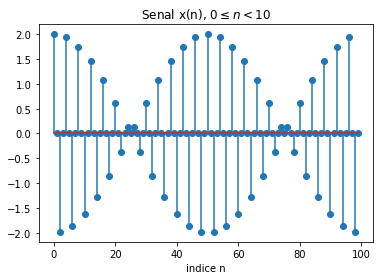

In [50]:
%pylab inline
#%matplotlib inline
#%matplotlib nbagg
stem(n,x)
xlabel('indice n')
title('Senal x(n), $0 \leq n < 10$')

Ahora obtengamos la DFT usando la funcion creada anteriormente:

In [52]:
y1 = dft(x,100)
magY1 = np.abs(y1)

In [53]:
m = n # indices en el dominio de frecuencia
N = 100 # numero de muestras
wm = 2*np.pi/N * m # frecuencias en unidades de pi 

Text(0.5,1,'Magnitud de la DFT de x(n)')

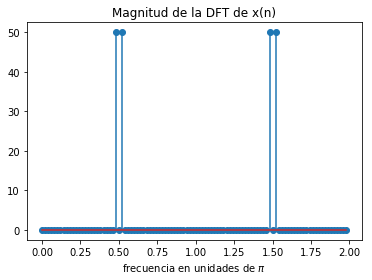

In [54]:
stem(wm/np.pi,magY1)
xlabel('frecuencia en unidades de $\pi$')
title('Magnitud de la DFT de x(n)')

Text(0.5,1,'Fase de la DFT de x(n)')

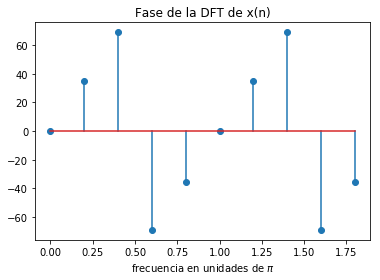

In [14]:
# Respuesta de fase
phaseY1 = np.angle(y1) * 180/np.pi # convertir a grados
stem(wm/np.pi,phaseY1)
xlabel('frecuencia en unidades de $\pi$')
title('Fase de la DFT de x(n)')

Segundo determinaremos la DFT cuando  $x(n)$ haciendo "zero-padding". Es decir incluir 90 zeros adicionales a la secuencia anterior.

In [15]:
x2 = np.concatenate((x,np.zeros(90)))
x2

array([ 2.00000000e+00,  1.24900090e-16, -1.98422940e+00, -3.60822483e-16,
        1.93716632e+00,  6.10622664e-16, -1.85955297e+00, -7.77156117e-16,
        1.75261336e+00,  8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [18]:
N = x2.size
print ('El tamano del arreglo x2 es ', N)
n = np.arange(0,N,1)

El tamano del arreglo x2 es  100


In [19]:
# Calcular la nueva DFT
Y2 = dft(x2,N)
MagY2 = np.abs(Y2)
m = n
wm = 2*np.pi/N * m # frecuencias en unidades de pi 

Text(0.5,0,'frecuencia en unidades de $\\pi$')

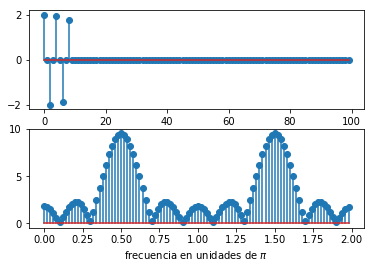

In [20]:
subplot(2,1,1)
stem(n,x2)
xlabel('Indice n')
subplot(2,1,2)
stem(wm/np.pi,MagY2)
xlabel('frecuencia en unidades de $\pi$')

# Efecto de ventanas

Ahora, veremos lo que pasa cuando tenemos una senal compuesta de dos sub-senales una de ellas es de baja amplitud 
a la que muestreamos a cierta tasa de muestreo. El objetivo es ver la DFT y luego aplicar una ventana para poder detectar la presencia de la senal escondida.

La senal es:
$$x(t) =  \cos(2 \pi f t) + 10 \cos(2 \pi (f + \Delta f)t)$$

donde $f$ es de un valor de 10 y $\Delta f$ es de 2.3.


In [21]:
fs = 64. # no olvidar poner el punto . al final
t = np.arange(0,2,1/fs)
f = 10 # la frecuencia de la senal pequena
deltaf = 2.3 # la otra frecuencia separada un valor deltaf


In [22]:
x=cos(2*pi*f*t) + 10*cos(2*pi*(f+deltaf)*t)

In [24]:
N = x.size
print (N)

128


In [25]:
X = dft(x,N)

In [26]:
# crear el vector frecuencia


Text(0.5,0,'Frecuencia (Hz)')

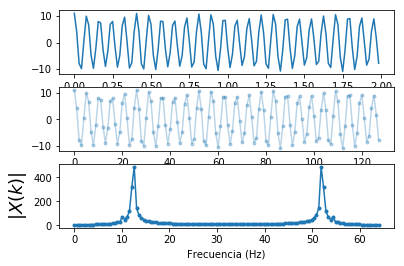

In [27]:
subplot(3,1,1)
plot(t,x)
xlabel('Tiempo (s)')
subplot(3,1,2)
plot(np.arange(0,N,1),x,'-o',label='signal',ms=3.,alpha=0.3)
xlabel('Indice n')
subplot(3,1,3)
plot(np.linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ylabel(r'$|X(k)|$',fontsize=18)
xlabel('Frecuencia (Hz)')

Apliquemos una ventana triangular. Para ello invocamos Scipy la libreria de Signal Processing:

In [28]:
from scipy import signal

In [29]:
window_1 = signal.triang(N) # donde N es el numero de muestras

Hagamos una bonita grafica usando matplotlib:


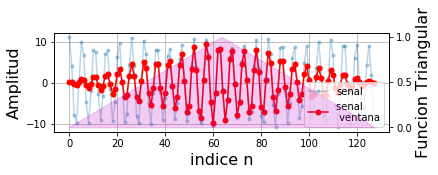

In [30]:
subplot(2,1,1)
plot(np.arange(0,N,1),x,'-o',label='senal',ms=3.,alpha=0.3)
plot(np.arange(0,N,1),window_1*x,'-or',label='senal \n ventana',ms=5.)
ylabel('Amplitud',fontsize=16)
xlabel('indice n',fontsize=16)
legend(loc=0)
grid()
ax2 = twinx()
ax2.fill_between(np.arange(0,N,1),window_1,alpha=0.2,color='m')
ax2.set_ylabel('Funcion Triangular',fontsize=16);

In [31]:
window_2 = signal.hanning(N) # Otra ventana Hanning

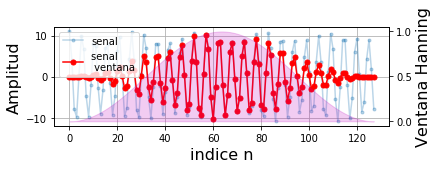

In [32]:
subplot(2,1,1)
plot(np.arange(0,N,1),x,'-o',label='senal',ms=3.,alpha=0.3)
plot(np.arange(0,N,1),window_2*x,'-or',label='senal \n ventana',ms=5.)
ylabel('Amplitud',fontsize=16)
xlabel('indice n',fontsize=16)
legend(loc=0)
grid()
ax2 = twinx()
ax2.fill_between(np.arange(0,N,1),window_2,alpha=0.2,color='m')
ax2.set_ylabel('Ventana Hanning',fontsize=16);

Veamos el efecto de las dos ventanas en el espectro

In [33]:
x_w1 = window_1 * x # ventana triangular
x_w2 = window_2 * x # ventana Hanning

In [34]:
X_W1 = dft(x_w1,N)
X_W2 = dft(x_w2,N)

Text(0.5,0,'Frecuencia (Hz)')

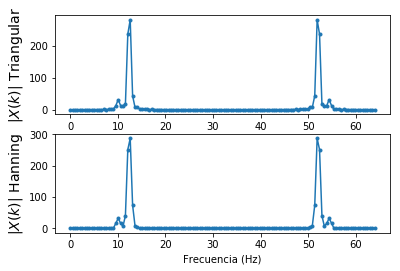

In [35]:
subplot(2,1,1)
plot(np.linspace(0,fs,len(X_W1)),abs(X_W1),'-o',ms=3.)
ylabel(r'$|X(k)|$ Triangular',fontsize=14)
xlabel('Frecuencia (Hz)')
subplot(2,1,2)
plot(np.linspace(0,fs,len(X_W2)),abs(X_W2),'-o',ms=3.)
ylabel(r'$|X(k)|$ Hanning',fontsize=14)
xlabel('Frecuencia (Hz)')

test modulo

In [36]:
x = np.array([10,11,12,13])
n = np.arange(0,4,1)

In [37]:
n

array([0, 1, 2, 3])

In [38]:
np.mod(-n,4)

array([0, 3, 2, 1], dtype=int32)

In [39]:
x[np.mod(-n,4)]

array([10, 13, 12, 11])